In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#test line - to see if I understand how to make changes and commit them properly to github

#### Code Overview

1. Define functions for important parameters used in the two waveform generation such as chirp mass
2. Define a function for non-evolving fgw that takes in masses, fgw, theta, phi, and r (which im taking as distance to source) and returns h_plus, h_cross, and combined h_plus + h_cross strain amplitudes
3. Define a function that accounts for change in fgw?

In [8]:
#Chirp Mass Calculator - enter masses as solar mass multiples
def chirp_mass(m1, m2):
    sol_mass = 1.989*10e30
    mass1 = sol_mass*m1
    mass2 = sol_mass*m2
    
    m_chirp = ( ((mass1*mass2)**(3/5)) / ( (mass1+mass2)**(1/5) ))
    return m_chirp

#strain calculator at constant frequency - enter distance in pc
def constant_f_strain_waveform(m1, m2, f_gw, duration, dt, r, theta, phi):
    
    #parameters to define
    M_c = chirp_mass(m1,m2)
    G = 6.67e-11
    c = 3.0*10e8
    distance = r*(3.0857*10e16)
    A = (4.0/distance)*((G*M_c) / (c**2))**(5/3)
    
    #define a array of time values
    t = np.arange(0, duration, dt)
    
    #compute retarded time
    t_ret = t - (distance/c)
    
    #compute strain amplitudes
    h_plus = A*(((np.pi*f_gw)/c)**(2/3)) * (1+(np.cos(theta))**2) * 0.5 * np.cos(2*np.pi*f_gw*t_ret+2*phi)
    h_cross = A*(((np.pi*f_gw)/c)**(2/3)) * np.cos(theta) * np.sin(2*np.pi*f_gw*t_ret+2*phi)
    
    h_combined = h_plus + h_cross
    return t, h_plus, h_cross

#strain calculation with increasing frequency
def chirp_strain_waveform(m1, m2, f_lower, dt, r, theta, phi):
    
    #parameters to define
    M_c = chirp_mass(m1,m2)
    G = 6.67e-11
    c = 3.0*10e8
    distance = r*(3.0857*10e16)
    A = (4.0/distance)*((G*M_c) / (c**2))**(5/3)
    
    #procedure seems to be:
    #1 - find time_until_coalescence for the lower frequency bound 
    #2 - use this to create a tau vector of length of time until coalescence 
    #3 - evaluate f over the tau vector
    #4 - evaluate waveform
    
    #1
    time_until_coalescence = 2.18*((1.21*1.989*10e30)/M_c)**(5/3) * (100/f_lower)**(8/3)
    print('duration (s):', time_until_coalescence, '(min):', time_until_coalescence/60)
    print('df:', 1.0/time_until_coalescence)
    
    #2 
    t = np.arange(0, int(time_until_coalescence), dt)
    tau = int(time_until_coalescence) - t
    #print(tau[-2:], type(tau))
    
    #3
    f_gw = (1/np.pi)*((5/256)*(1/tau))**(3/8) * ((G*M_c)/(c**3))**(-5/8)
    #print(type(f_gw))
  
    #4
    t_ret = t - (distance/c)
    
    h_plus = A*(((np.pi*f_gw)/c)**(2/3)) * (1+(np.cos(theta))**2) * 0.5 * np.cos(2*np.pi*f_gw*t_ret+2*phi)
    h_cross = A*(((np.pi*f_gw)/c)**(2/3)) * np.cos(theta) * np.sin(2*np.pi*f_gw*t_ret+2*phi)
    
    return t, h_plus, h_cross

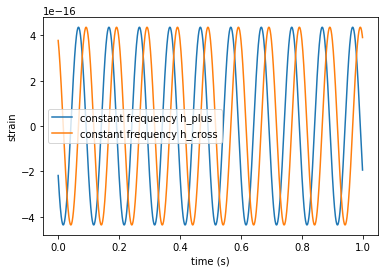

In [6]:
##plot outputs of functions to check

#constant_f_strain_waveform(m1, m2, f_gw, duration, dt, r, theta, phi)
times, plus, cross = constant_f_strain_waveform(100, 100, 10, 1, 0.001, 1, 0, 0)

plt.plot(times, plus, label='constant frequency h_plus')
plt.plot(times, cross, label='constant frequency h_cross')
plt.xlabel('time (s)')
plt.ylabel('strain')
plt.legend()
plt.show()


In [18]:
#chirp_strain_waveform(m1, m2, f_gw, dt, r, theta, phi)
times, plus, cross = chirp_strain_waveform(100, 100, 1, 0.001, 1, 0, 0)



duration (s): 377.37701303550716 (min): 6.289616883925119
df: 0.002649869932342463


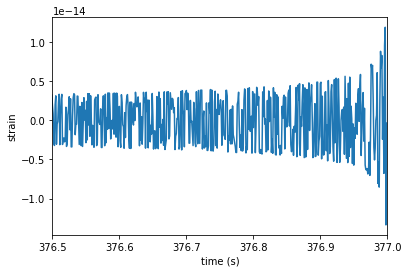

In [21]:
plt.plot(times, plus, label='h_plus chirp')
plt.xlabel('time (s)')
plt.ylabel('strain')
plt.xlim(376.5, 377)
#plt.legend()
plt.show()